In [207]:
#importing modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [208]:
#setting file path to read
voc_path = Path("Resources/voc_rehab.csv")
homeless_path = Path("Resources/experiencing_homelessness-gender_demographics.csv")
success_path = Path('Resources/successful_closures.csv')
coc_county_path = Path('Resources/County-CoC Mapping.csv')

# Read with Pandas
vocation_df = pd.read_csv(voc_path)
vocation_df.head()

,Year,County,Sex,Number of Consumers,Annotation Code,Count Annotation Desc,Percent,Percent Annotation Desc
0,2014,Alameda,Not Reported,4,NaN,NaN,NaN,NaN
1,2014,Alameda,Female,"2,356",NaN,NaN,NaN,NaN
2,2014,Alameda,Male,"2,391",NaN,NaN,NaN,NaN
3,2014,Alpine,Female,NaN,1.00,Cell suppressed for small number. A score over...,1.00,This value represents less than or equal to 1 ...
4,2014,Amador,Female,NaN,1.00,Cell suppressed for small number. A score over...,1.00,This value represents less than or equal to 1 ...


In [209]:
#shows what columns to determine relevance for vocational data
vocation_df.columns

Index(['Year', 'County', 'Sex', 'Number of Consumers', 'Annotation Code',
       'Count Annotation Desc', 'Percent', 'Percent Annotation Desc'],
      dtype='object')

In [210]:
#removing irrelevant columns
del vocation_df["Annotation Code"]
del vocation_df["Count Annotation Desc"]
del vocation_df["Percent"]
del vocation_df["Percent Annotation Desc"]
del vocation_df["Sex"]

#removing commas from numerical data
vocation_df = vocation_df.replace(',', '', regex=True)
vocation_df.head()

,Year,County,Number of Consumers
0,2014,Alameda,4
1,2014,Alameda,2356
2,2014,Alameda,2391
3,2014,Alpine,NaN
4,2014,Amador,NaN


In [211]:
#filling na values w/0
vocation_df = vocation_df.fillna(0)

#reducing data to year 2017
vocation_df = vocation_df.loc[vocation_df['Year'] == 2017, :]

#filtering data by year
vocation_df = vocation_df.set_index('Year')

#changing 'number of consumers' to type int
vocation_df = vocation_df.astype({'Number of Consumers': int})

vocation_df.head()

,County,Number of Consumers
Year,,
2017,Alameda,1879
2017,Alameda,2145
2017,Alameda,2
2017,Alpine,0
2017,Alpine,0


In [212]:
#adding together total number of consumers per coutny per year
vocation_df = vocation_df.groupby(['Year', 'County'])['Number of Consumers'].sum().reset_index()

#adding 'County' to names of counties
vocation_df['County'] = vocation_df['County'] + ' County'
vocation_df

,Year,County,Number of Consumers
0,2017,Alameda County,4026
1,2017,Alpine County,0
2,2017,Amador County,33
3,2017,Butte County,883
4,2017,Calaveras County,36
5,2017,Colusa County,36
6,2017,Contra Costa County,2682
7,2017,Del Norte County,202
8,2017,El Dorado County,344
9,2017,Fresno County,2544


In [213]:
#introducing homeless data
homeless_df = pd.read_csv(homeless_path)
homeless_df

,CALENDAR_YEAR,COC_ID,COC_NAME,GENDER,EXPERIENCING_HOMELESSNESS_CNT
0,2017,All,California,Female,79356
1,2017,All,California,Male,101589
2,2017,All,California,Non-Singular Gender,142
3,2017,All,California,Questioning Gender,*
4,2017,All,California,Transgender,674
...,...,...,...,...,...
1459,2023 Q1,CA-614,San Luis Obispo County CoC,Female,989
1460,2023 Q1,CA-614,San Luis Obispo County CoC,Male,1239
1461,2023 Q1,CA-614,San Luis Obispo County CoC,Non-Singular Gender,*
1462,2023 Q1,CA-614,San Luis Obispo County CoC,Transgender,*


In [214]:
#cleaning homeless data
#renaming year column
homeless_df = homeless_df.rename(columns={'CALENDAR_YEAR': 'Year', 'EXPERIENCING_HOMELESSNESS_CNT': 'Homeless_count'})

#removing extra columns
del homeless_df['COC_ID']
del homeless_df['GENDER']

#removing extra parts from names/numbers
homeless_df = homeless_df.replace('Q1', '', regex=True)

#replacing * with 0
homeless_df = homeless_df.loc[homeless_df['Homeless_count']!='*']

#changing types to ints
homeless_df = homeless_df.astype({'Year': int, 'COC_NAME': str, 'Homeless_count': int})

#narrowing time range to match with other data
homeless_df = homeless_df.loc[homeless_df["Year"] < 2018, :]

#grouping together by county
homeless_df = homeless_df.groupby('COC_NAME')['Homeless_count'].sum().reset_index()

homeless_df

,COC_NAME,Homeless_count
0,Alameda County CoC,6596
1,"Alpine, Inyo, Mono Counties CoC",161
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",383
3,Butte County CoC,1270
4,California,183228
5,"Colusa, Glenn, Trinity Counties CoC",198
6,Contra Costa County CoC,4782
7,El Dorado County CoC,133
8,"Fresno, Madera Counties CoC",2225
9,Glendale CoC (Los Angeles County),336


In [215]:
#intoducing COC to County data
coc_county_df = pd.read_csv(coc_county_path)

#Filter out California
coc_county_df = coc_county_df.loc[coc_county_df['County'] != 'California']

#changing column name
coc_county_df = coc_county_df.rename(columns= {'Continuum of Care': 'COC_NAME'})

coc_county_df

,County,COC_NAME
0,Alameda County,Alameda County CoC
1,Alpine County,"Alpine, Inyo, Mono Counties CoC"
2,Inyo County,"Alpine, Inyo, Mono Counties CoC"
3,Mono County,"Alpine, Inyo, Mono Counties CoC"
4,Amador County,"Amador, Calaveras, Mariposa, Tuolumne Counties..."
5,Calaveras County,"Amador, Calaveras, Mariposa, Tuolumne Counties..."
6,Mariposa County,"Amador, Calaveras, Mariposa, Tuolumne Counties..."
7,Tuolumne County,"Amador, Calaveras, Mariposa, Tuolumne Counties..."
8,Butte County,Butte County CoC
10,Colusa County,"Colusa, Glenn, Trinity Counties CoC"


In [216]:
#introducing successful vocational services
success_df = pd.read_csv(success_path)
success_df

,Year,County,Occupation,Successful Closures,Annotation Code,Count Annotation Desc,Percent,Percent Annotation Desc
0,2014,Alameda,Not Reported,67.00,NaN,NaN,NaN,NaN
1,2014,Alameda,Clerical and Administrative Support,114.00,NaN,NaN,NaN,NaN
2,2014,Alameda,Community and Social Service Occupations,3.00,NaN,NaN,NaN,NaN
3,2014,Alameda,Computer and Mathematical Occupations,5.00,NaN,NaN,NaN,NaN
4,2014,Alameda,"Education, Training, and Library Occupations",4.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1935,2017,Yuba,"Professional, Paraprofessional and Technical",NaN,1.00,Cell suppressed for small number. A score over...,1.00,This value represents less than or equal to 1 ...
1936,2017,Yuba,Protective Service Occupations,NaN,1.00,Cell suppressed for small number. A score over...,1.00,This value represents less than or equal to 1 ...
1937,2017,Yuba,RSA Special Occupations and Miscellaneous,NaN,1.00,Cell suppressed for small number. A score over...,1.00,This value represents less than or equal to 1 ...
1938,2017,Yuba,Sales and Related Occupations,NaN,1.00,Cell suppressed for small number. A score over...,1.00,This value represents less than or equal to 1 ...


In [217]:
#displaying columns to display relevance
success_df.columns

Index(['Year', 'County', 'Occupation', 'Successful Closures',
       'Annotation Code', 'Count Annotation Desc', 'Percent',
       'Percent Annotation Desc'],
      dtype='object')

In [218]:
#removing irrelevant columns
del success_df['Occupation']
del success_df['Annotation Code']
del success_df['Count Annotation Desc']
del success_df['Percent']
del success_df['Percent Annotation Desc']

#replacing na w/ value of 0
success_df = success_df.fillna(0)
success_df

,Year,County,Successful Closures
0,2014,Alameda,67.00
1,2014,Alameda,114.00
2,2014,Alameda,3.00
3,2014,Alameda,5.00
4,2014,Alameda,4.00
...,...,...,...
1935,2017,Yuba,0.00
1936,2017,Yuba,0.00
1937,2017,Yuba,0.00
1938,2017,Yuba,0.00


In [219]:
#reducing data to year 2017
success_df = success_df.loc[success_df["Year"] == 2017 , :]

#adding total number of successful closures per county per year
success_df = success_df.groupby(['Year', 'County'])['Successful Closures'].sum().reset_index()

#adding 'County' to names of counties
success_df['County'] = success_df['County'] + ' County'
success_df

,Year,County,Successful Closures
0,2017,Alameda County,368.00
1,2017,Amador County,1.00
2,2017,Butte County,104.00
3,2017,Calaveras County,0.00
4,2017,Colusa County,0.00
5,2017,Contra Costa County,253.00
6,2017,Del Norte County,1.00
7,2017,El Dorado County,33.00
8,2017,Fresno County,145.00
9,2017,Glenn County,14.00


In [220]:
#merging together vocational data
merged_vocation_df = pd.merge(vocation_df, success_df, on=['Year', 'County'], how='inner')
merged_vocation_df

,Year,County,Number of Consumers,Successful Closures
0,2017,Alameda County,4026,368.00
1,2017,Amador County,33,1.00
2,2017,Butte County,883,104.00
3,2017,Calaveras County,36,0.00
4,2017,Colusa County,36,0.00
5,2017,Del Norte County,202,1.00
6,2017,El Dorado County,344,33.00
7,2017,Fresno County,2544,145.00
8,2017,Glenn County,188,14.00
9,2017,Humboldt County,639,74.00


In [221]:
#merging all data frames into one and adjusting formating
master_df = pd.merge(merged_vocation_df, coc_county_df, on='County', how='left')
pd.options.display.float_format = '{:,.2f}'.format

#changing column name
master_df.rename(columns= {'Continuum of Care': 'COC'})

,Year,County,Number of Consumers,Successful Closures,COC_NAME
0,2017,Alameda County,4026,368.00,Alameda County CoC
1,2017,Amador County,33,1.00,"Amador, Calaveras, Mariposa, Tuolumne Counties..."
2,2017,Butte County,883,104.00,Butte County CoC
3,2017,Calaveras County,36,0.00,"Amador, Calaveras, Mariposa, Tuolumne Counties..."
4,2017,Colusa County,36,0.00,"Colusa, Glenn, Trinity Counties CoC"
5,2017,Del Norte County,202,1.00,"Shasta, Siskiyou, Lassen, Plumas, Del Norte, M..."
6,2017,El Dorado County,344,33.00,El Dorado County CoC
7,2017,Fresno County,2544,145.00,"Fresno, Madera Counties CoC"
8,2017,Glenn County,188,14.00,"Colusa, Glenn, Trinity Counties CoC"
9,2017,Humboldt County,639,74.00,Humboldt County CoC


In [222]:
#grouping by COC and adding together county data to match COC
master_df = master_df.groupby('COC_NAME')[['Number of Consumers', 'Successful Closures']].sum().reset_index()
master_df

,COC_NAME,Number of Consumers,Successful Closures
0,Alameda County CoC,4026,368.00
1,"Alpine, Inyo, Mono Counties CoC",0,0.00
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",167,1.00
3,Butte County CoC,883,104.00
4,"Colusa, Glenn, Trinity Counties CoC",224,14.00
5,El Dorado County CoC,344,33.00
6,"Fresno, Madera Counties CoC",2740,158.00
7,Humboldt County CoC,639,74.00
8,Imperial County CoC,1026,50.00
9,Kern County CoC,1768,71.00


In [223]:
#adding homeless data to master df
master_df = pd.merge(master_df, homeless_df, on= 'COC_NAME', how= 'left')
master_df

,COC_NAME,Number of Consumers,Successful Closures,Homeless_count
0,Alameda County CoC,4026,368.00,"6,596.00"
1,"Alpine, Inyo, Mono Counties CoC",0,0.00,161.00
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",167,1.00,383.00
3,Butte County CoC,883,104.00,"1,270.00"
4,"Colusa, Glenn, Trinity Counties CoC",224,14.00,198.00
5,El Dorado County CoC,344,33.00,133.00
6,"Fresno, Madera Counties CoC",2740,158.00,"2,225.00"
7,Humboldt County CoC,639,74.00,946.00
8,Imperial County CoC,1026,50.00,497.00
9,Kern County CoC,1768,71.00,"4,614.00"


In [241]:
#removal of points without data and outliers
master_df = master_df.loc[master_df['COC_NAME']!= 'Yuba, Sutter Counties CoC']
master_df = master_df.loc[master_df['COC_NAME']!= 'Los Angeles County CoC']
master_df

,COC_NAME,Number of Consumers,Successful Closures,Homeless_count
0,Alameda County CoC,4026,368.00,"6,596.00"
1,"Alpine, Inyo, Mono Counties CoC",0,0.00,161.00
2,"Amador, Calaveras, Mariposa, Tuolumne Counties...",167,1.00,383.00
3,Butte County CoC,883,104.00,"1,270.00"
4,"Colusa, Glenn, Trinity Counties CoC",224,14.00,198.00
5,El Dorado County CoC,344,33.00,133.00
6,"Fresno, Madera Counties CoC",2740,158.00,"2,225.00"
7,Humboldt County CoC,639,74.00,946.00
8,Imperial County CoC,1026,50.00,497.00
9,Kern County CoC,1768,71.00,"4,614.00"


The correlation between homeless rate and unemployment rate is 0.8


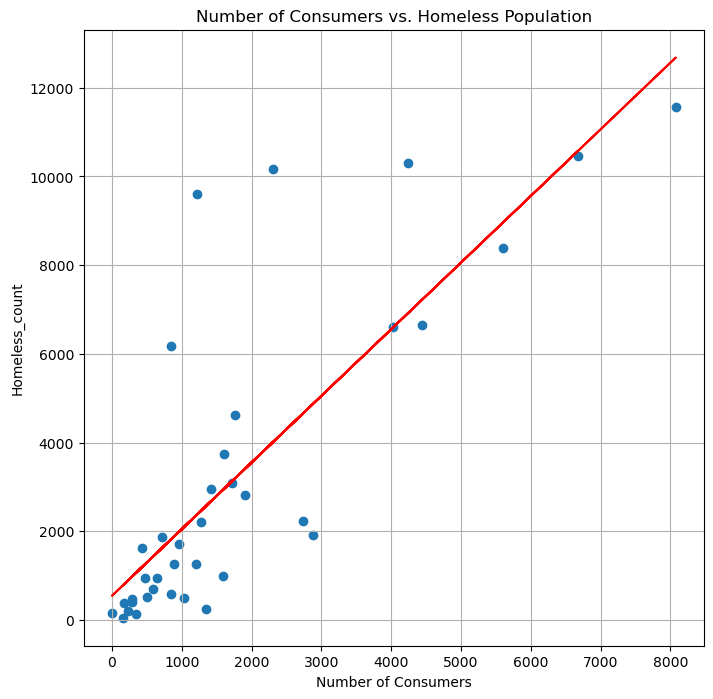

In [242]:
#plotting number of consumers x homelessness
master_df.plot(kind="scatter", x="Number of Consumers", y="Homeless_count", grid=True, figsize=(8,8), 
               title="Number of Consumers vs. Homeless Population")

#calculating correlation
x_axis = master_df['Number of Consumers']
y_axis = master_df['Homeless_count']

print(f"The correlation between homeless rate and unemployment rate is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.show()

The correlation between homeless rate and unemployment rate is 0.77


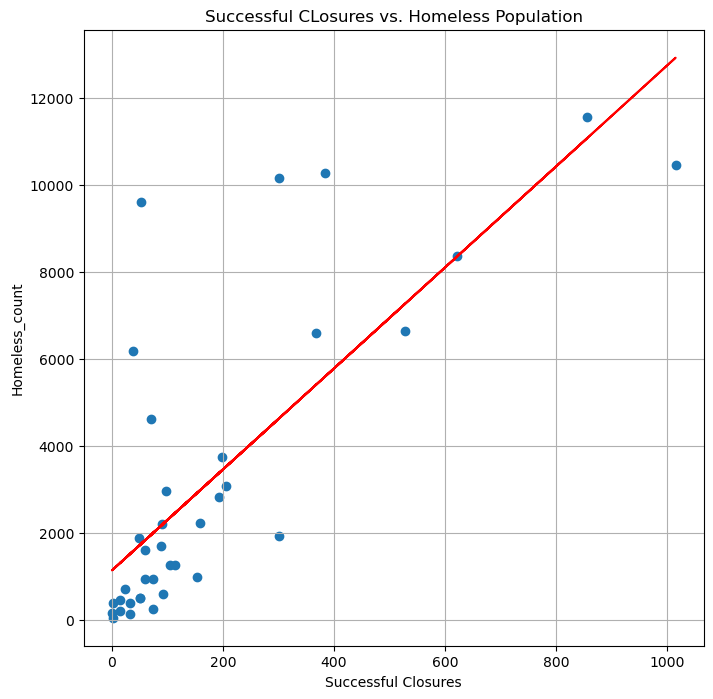

In [243]:
#plotting Successful closures x homelessness
master_df.plot(kind="scatter", x="Successful Closures", y="Homeless_count", grid=True, figsize=(8,8), 
               title="Successful CLosures vs. Homeless Population")

#calculating correlation
#calculating correlation
x_axis = master_df['Successful Closures']
y_axis = master_df['Homeless_count']

print(f"The correlation between homeless rate and unemployment rate is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")

plt.show()